# **Reliance Industries**
### ***Stock Analysis and Forecasting***

### Business Objective

Predict the Reliance Industries Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2023 for Reliance Industries stock.

- Split the last year(2023-24) into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 31-March-2023.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link.

- https://finance.yahoo.com/quote/RELIANCE.NS/history?p=RELIANCE.NS

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

#### **Web Scraping**

##### The **yfinance** is one of the famous modules in Python, which is used to collect online data, and with it, we can collect the financial data of Yahoo. With the help of the yfinance module, we retrieve and collect the company's financial information (such as financial ratios, etc.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing dataset from  Jan_2015 to March_2023
data=yf.download('RELIANCE.NS', start='2015-1-1', end='2023-3-29')
df = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821
2015-01-02,406.009430,409.643921,404.272217,404.843658,381.799011,3665683
2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616913,5051970


In [ ]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,2072.364990,2076.749268,2028.753296,2033.645142,2026.486694,6187972
2023-03-27,2046.751831,2080.441162,2030.783936,2065.257812,2057.988037,7027161
2023-03-28,2072.134277,2082.748779,2064.750244,2074.903320,2067.599609,6288212


So Here we successfully imported the Data From 2015 to 2023(March)

## **Exploratory Data Ananlysis**

In [ ]:
# Finding null values, if any
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Finding duplicate columns, if any
df.duplicated().sum()

0

For better analysis we are splitting year from Date Column

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821
1,2015-01-02,406.009430,409.643921,404.272217,404.843658,381.799011,3665683
2,2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616913,5051970


In [ ]:
#Splitting Month and Year from Date Column
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year


In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821,1,2015
1,2015-01-02,406.009430,409.643921,404.272217,404.843658,381.799011,3665683,1,2015
2,2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616913,5051970,1,2015


#### *Descriptive Statistics*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2036 non-null   datetime64[ns]
 1   Open       2036 non-null   float64       
 2   High       2036 non-null   float64       
 3   Low        2036 non-null   float64       
 4   Close      2036 non-null   float64       
 5   Adj Close  2036 non-null   float64       
 6   Volume     2036 non-null   int64         
 7   Month      2036 non-null   int32         
 8   Year       2036 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1)
memory usage: 127.4 KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,2036,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,2036.000000
mean,2019-02-16 19:37:36.188605184,1243.624476,1257.487888,1228.896541,1242.586595,1224.256619,9.776023e+06,6.392927,2018.639980
min,2015-01-01 00:00:00,373.322052,373.824921,364.110138,370.647614,349.549469,8.528280e+05,1.000000,2015.000000
25%,2017-01-24 18:00:00,496.659805,500.374306,490.876663,495.911217,478.907219,5.675218e+06,3.000000,2017.000000
50%,2019-02-14 12:00:00,1111.371460,1129.566650,1097.679321,1113.291504,1091.110840,7.711489e+06,6.000000,2019.000000
75%,2021-03-09 06:00:00,1935.772583,1956.990021,1914.878204,1932.807434,1915.229004,1.104986e+07,9.000000,2021.000000
max,2023-03-28 00:00:00,2636.225586,2636.225586,2571.569336,2602.720703,2585.124512,7.134168e+07,12.000000,2023.000000
std,NaN,704.294876,711.652181,696.073723,703.496027,705.579349,7.172675e+06,3.489659,2.383307


In [ ]:
df_2 = df[["Open","High","Low","Close"]]

In [ ]:
df_2.describe()

,Open,High,Low,Close
count,2036.000000,2036.000000,2036.000000,2036.000000
mean,1243.624476,1257.487888,1228.896541,1242.586595
std,704.294876,711.652181,696.073723,703.496027
min,373.322052,373.824921,364.110138,370.647614
25%,496.659805,500.374306,490.876663,495.911217
50%,1111.371460,1129.566650,1097.679321,1113.291504
75%,1935.772583,1956.990021,1914.878204,1932.807434
max,2636.225586,2636.225586,2571.569336,2602.720703


In [ ]:
df_2.corr()

,Open,High,Low,Close
Open,1.000000,0.999746,0.999745,0.999470
High,0.999746,1.000000,0.999688,0.999803
Low,0.999745,0.999688,1.000000,0.999779
Close,0.999470,0.999803,0.999779,1.000000


Every attributes are highly corelated

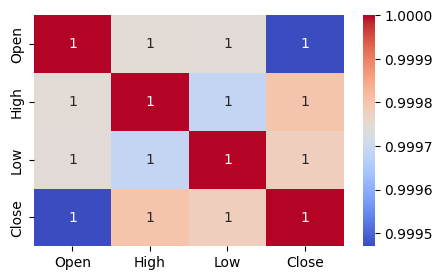

In [ ]:
# Heat Map
plt.figure(figsize=(5, 3))
sns.heatmap(df_2.corr(), annot=True, cmap="coolwarm")
plt.show()


Every attribute is highly co-related, we can see from Heat map also

In [ ]:
sns.set_style(style='darkgrid')

Text(0.5, 1.0, 'Low Price Year wise')

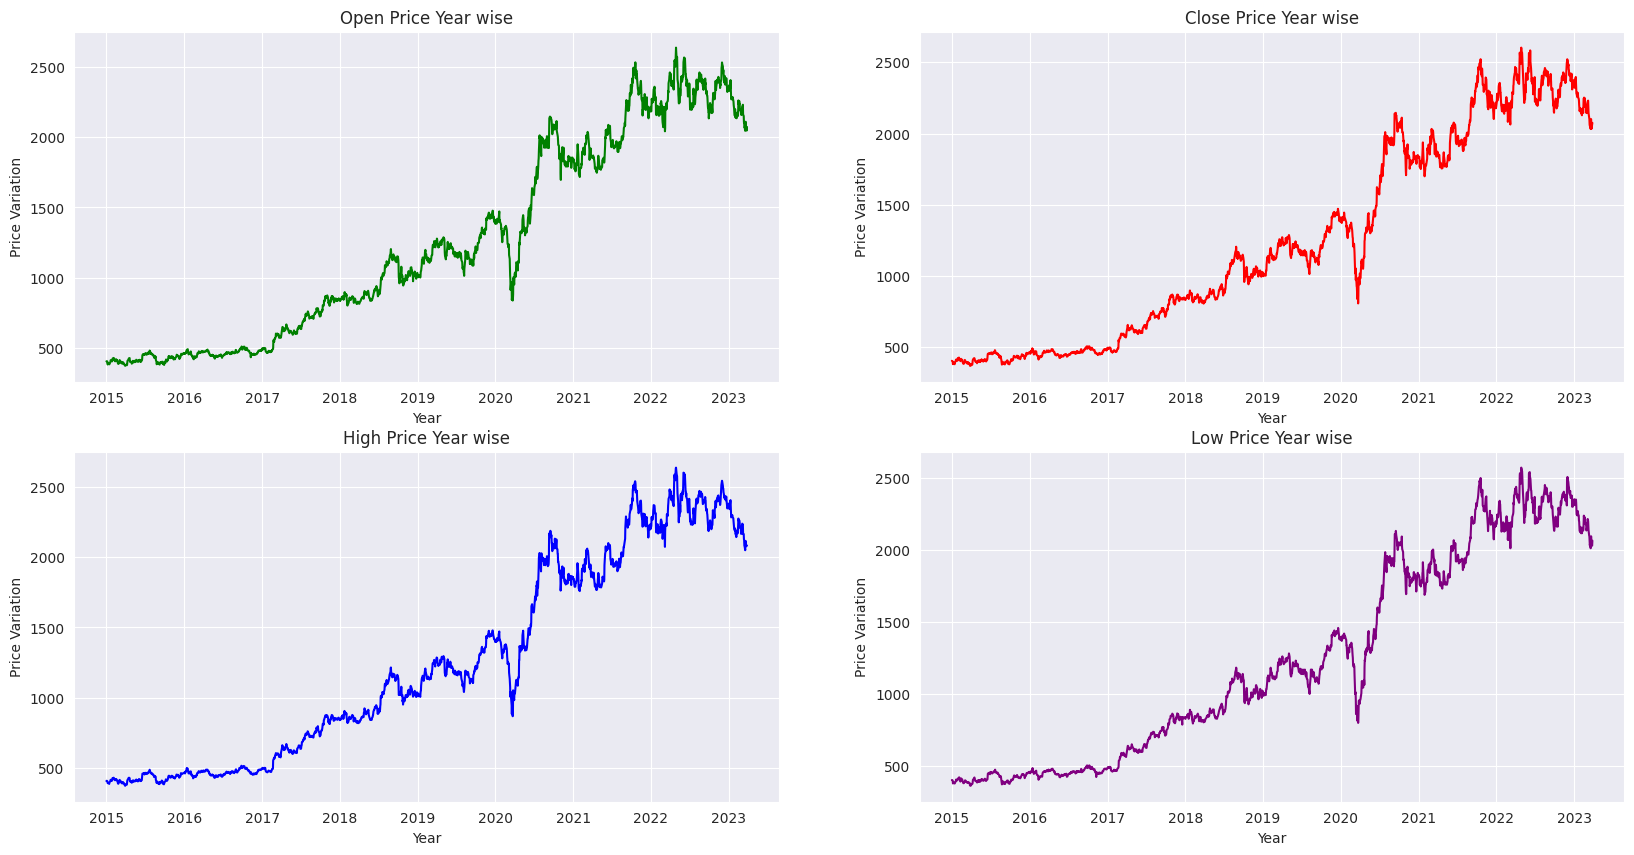

In [ ]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(df["Date"],df['Open'],color='green')
plt.xlabel('Year')
plt.ylabel('Price Variation')
plt.title('Open Price Year wise')
#Plot 2
plt.subplot(2,2,2)
plt.plot(df["Date"],df['Close'],color='red')
plt.xlabel('Year')
plt.ylabel('Price Variation')
plt.title('Close Price Year wise')
#Plot 3
plt.subplot(2,2,3)
plt.plot(df["Date"],df['High'],color='blue')
plt.xlabel('Year')
plt.ylabel('Price Variation')
plt.title('High Price Year wise')
#Plot 4
plt.subplot(2,2,4)
plt.plot(df["Date"],df['Low'],color='purple')
plt.xlabel('Year')
plt.ylabel('Price Variation')
plt.title('Low Price Year wise')

If we observe the plots clearly the **stock price got down rapidly in 2020, Due to CORONA**

And Also **Rises rapidly after lockdown**

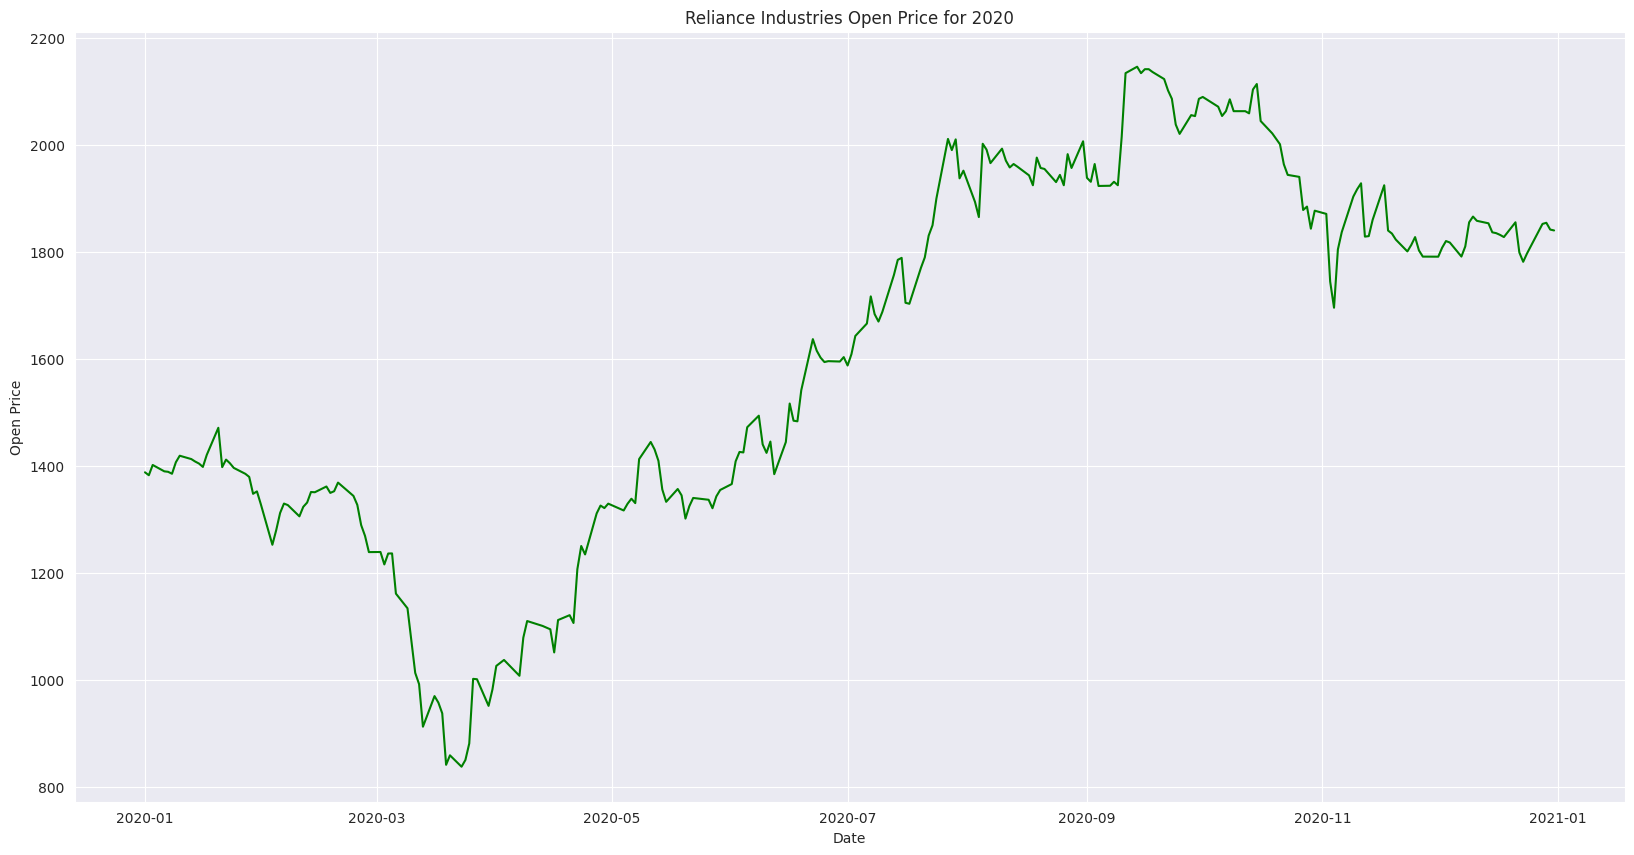

In [ ]:
#Line plot for 2020 year
df_2020 = df[df['Year'] == 2020]
plt.figure(figsize=(20, 10))
plt.plot(df_2020['Date'], df_2020['Open'], color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Reliance Industries Open Price for 2020')
plt.show()


##### If we observe the graph., **stock falls from 1500 to 800(46%)** during peak CORONA. and after that it **Recovered from 800 to 2100(162%)** upto year end

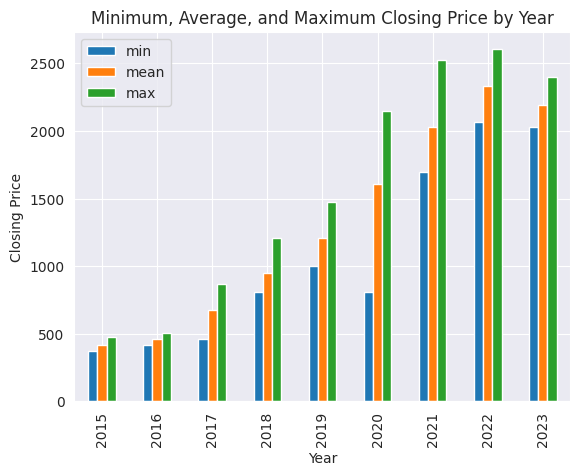

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for minimum, average, and maximum closing price by year
df.groupby('Year')['Close'].agg(['min', 'mean', 'max']).plot(kind='bar')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Minimum, Average, and Maximum Closing Price by Year')

# Show the plot
plt.show()


##### By seeing above plot., We can analyze(min,max,avg) stock price. There is a dip from 2022 to 2023

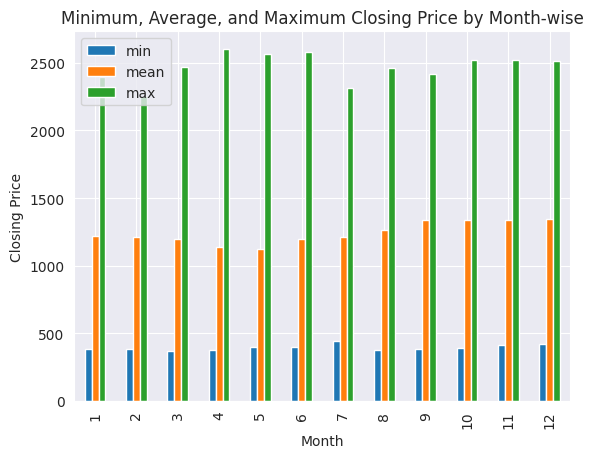

In [ ]:
# month wise stock analysis from 2015 to 2023

# Create a bar plot for minimum, average, and maximum closing price by year
df.groupby('Month')['Close'].agg(['min', 'mean', 'max']).plot(kind='bar')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Minimum, Average, and Maximum Closing Price by Month-wise')

# Show the plot
plt.show()

##### If we observe the above plot., **there is chance of fall in reliance stock from July to September**

Text(0.5, 1.0, 'Box plot for Low price')

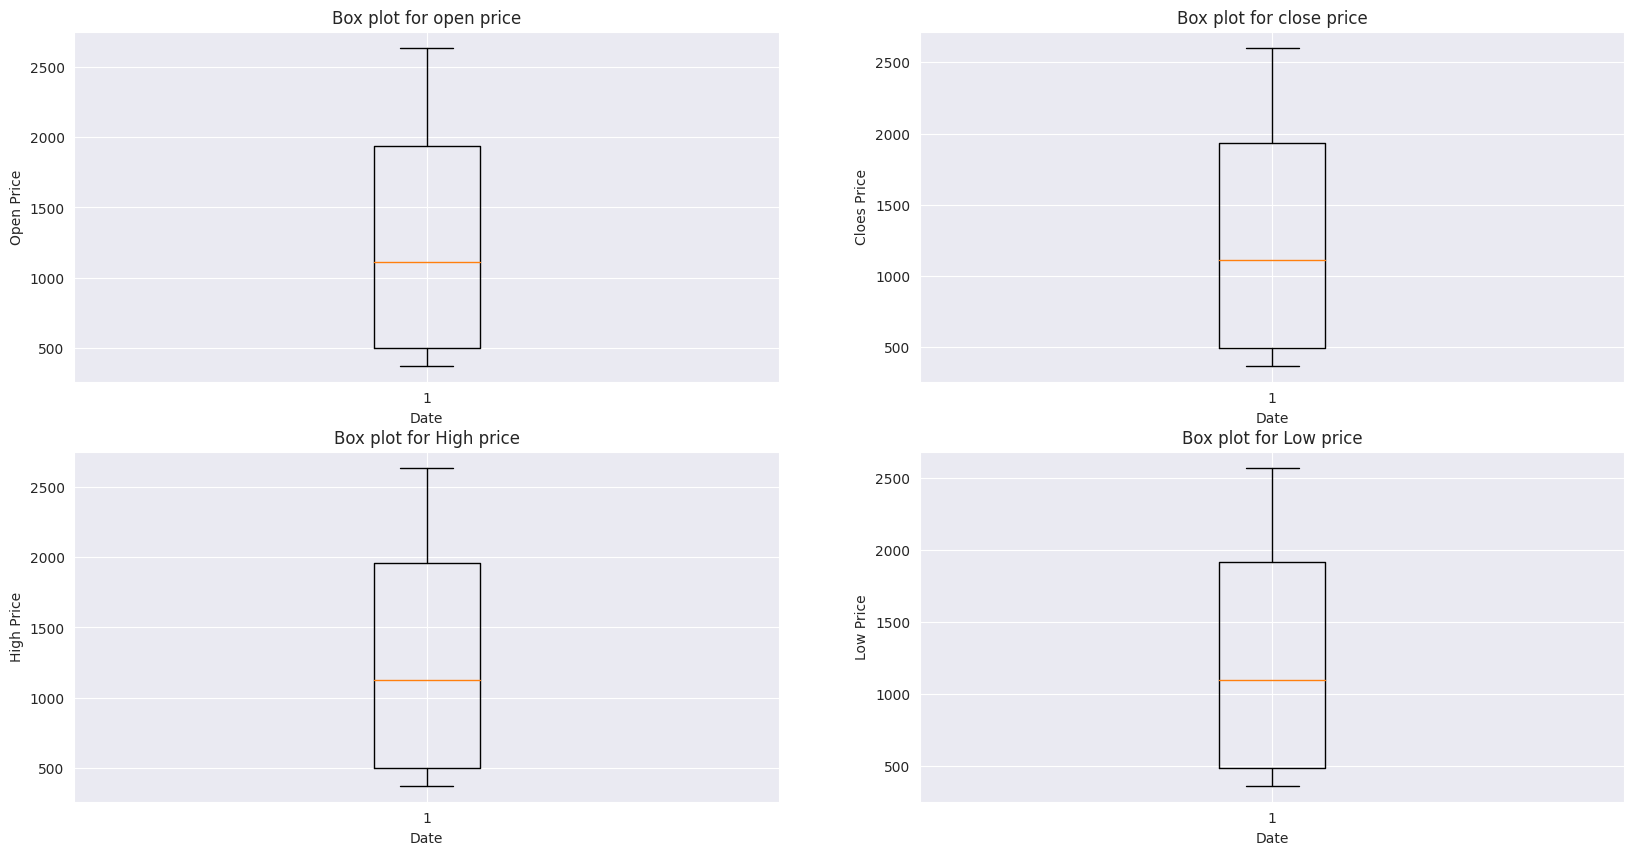

In [ ]:
#Box plot for any outliers in Dataset
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Box plot for open price')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Box plot for close price')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(df['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Box plot for High price')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(df['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Box plot for Low price')

##### **So No outliers**

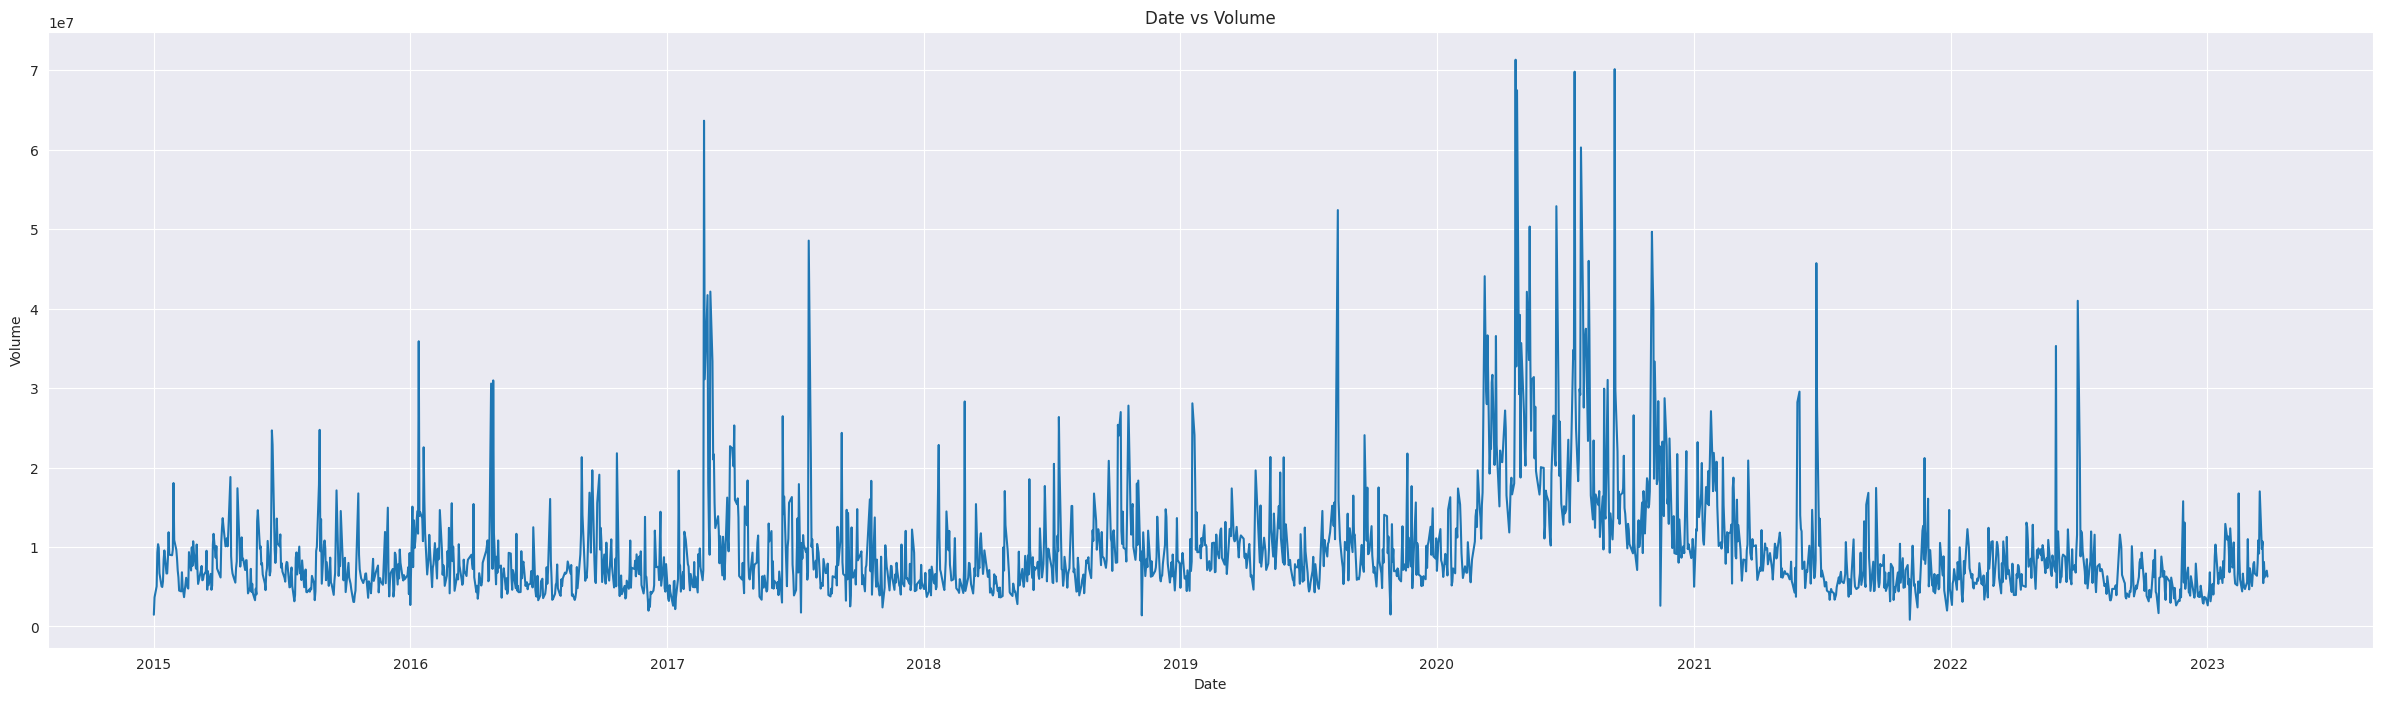

In [ ]:
#Date v/s volume

figure=plt.figure(figsize=(30,8))
plt.plot(df['Date'],df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

##### From the Volume plot., **Between 2020 and 2021., Total no of Shares Sold/Bought(Buying/selling activity) is very High.**

## **Finding long-term and short-term trends**

#### A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. **A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend**.

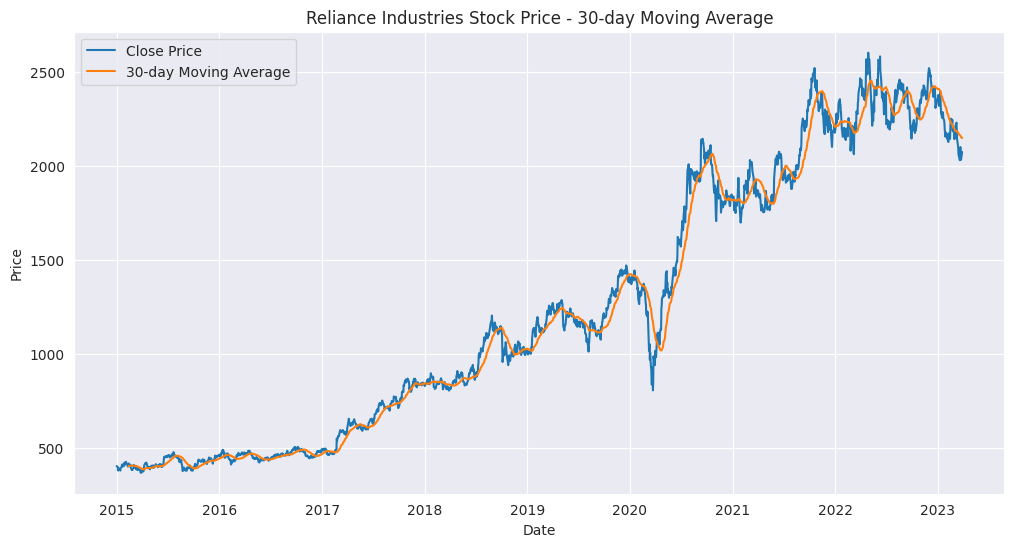

In [ ]:
#plot for 30 days moving average of the stock closing price

plt.figure(figsize=(12, 6))
plt.plot(df["Date"],df['Close'], label='Close Price')
plt.plot(df['Date'],df['Close'].rolling(window=30).mean(), label='30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Industries Stock Price - 30-day Moving Average')
plt.legend()
plt.show()


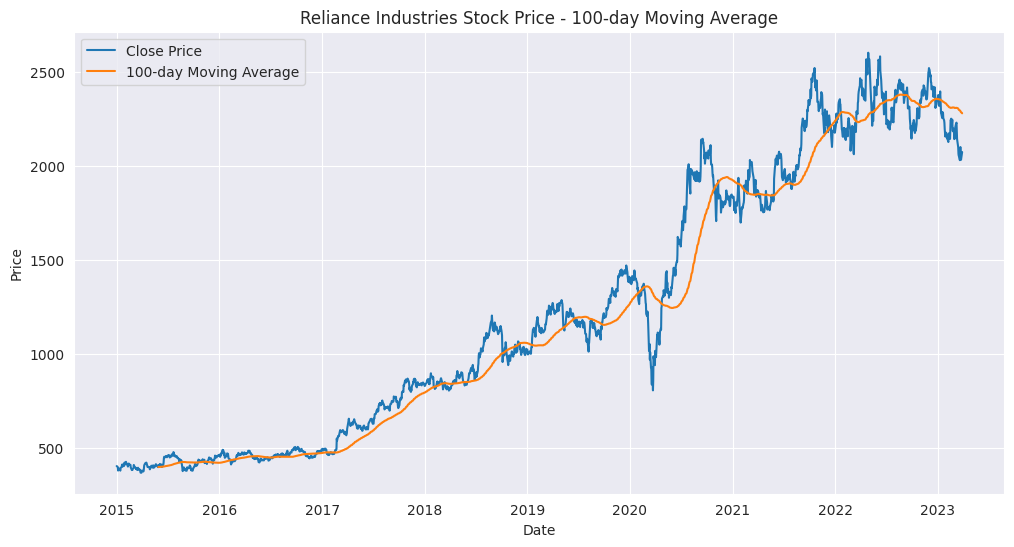

In [ ]:
#plot for 100 days moving average of the stock closing price

plt.figure(figsize=(12, 6))
plt.plot(df["Date"],df['Close'], label='Close Price')
plt.plot(df['Date'],df['Close'].rolling(window=100).mean(), label='100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Industries Stock Price - 100-day Moving Average')
plt.legend()
plt.show()

##### If we observe the Moving averages., **stock is in down trend during Corona**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812164,1481821,1,2015
1,2015-01-02,406.009430,409.643921,404.272217,404.843658,381.799011,3665683,1,2015
2,2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616913,5051970,1,2015
3,2015-01-06,397.734741,399.106232,380.362396,382.236786,360.478943,9313990,1,2015
4,2015-01-07,382.693970,392.614471,382.648254,390.557220,368.325806,10360156,1,2015


In [ ]:
new_df = df[['Date', 'Close','Month','Year']]
new_df.head()

,Date,Close,Month,Year
0,2015-01-01,405.917999,1,2015
1,2015-01-02,404.843658,1,2015
2,2015-01-05,400.409149,1,2015
3,2015-01-06,382.236786,1,2015
4,2015-01-07,390.557220,1,2015


In [ ]:
new_df = new_df.rename(columns={"Close": "Price"})

In [ ]:
new_df

,Date,Price,Month,Year
0,2015-01-01,405.917999,1,2015
1,2015-01-02,404.843658,1,2015
2,2015-01-05,400.409149,1,2015
3,2015-01-06,382.236786,1,2015
4,2015-01-07,390.557220,1,2015
...,...,...,...,...
2031,2023-03-22,2101.301025,3,2023
2032,2023-03-23,2074.718750,3,2023
2033,2023-03-24,2033.645142,3,2023
2034,2023-03-27,2065.257812,3,2023


In [ ]:
heatmap_y_month = pd.pivot_table(data=new_df,values="Price",index="Year",columns="Month",fill_value=0)
heatmap_y_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,400.674747,407.294321,390.265503,402.087434,405.493987,429.028807,462.265751,424.986200,391.168678,420.289034,434.212792,447.577293
2016,468.705234,437.772708,467.805763,471.702976,441.952069,442.903806,459.696774,467.086870,486.309567,492.472299,457.607197,475.460286
2017,483.430567,495.475694,583.965601,637.023224,612.426286,626.667309,698.737421,724.213553,751.504203,808.802725,842.087963,840.706070
2018,859.832253,843.358839,831.010537,855.077425,866.814428,900.206281,977.783250,1123.627837,1134.501485,1006.845770,1017.704892,1025.202417
2019,1060.677626,1142.720979,1206.743944,1245.188843,1201.753207,1192.285047,1150.017875,1122.729724,1131.080097,1266.375958,1369.594977,1428.969250
2020,1387.175919,1317.404258,1007.089591,1162.759460,1347.442524,1506.549444,1790.555160,1948.261120,2043.873713,1995.380261,1815.281903,1826.005926
2021,1806.921863,1856.385413,1935.561076,1810.259830,1820.693011,2019.775002,1930.269223,1987.503993,2238.592901,2428.559814,2290.363708,2204.546610
2022,2262.994434,2185.660913,2270.348447,2466.796811,2368.913842,2422.700029,2243.647380,2409.762915,2312.189686,2249.398784,2403.073626,2404.573575
2023,2281.789249,2184.301807,2112.894416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Month', ylabel='Year'>

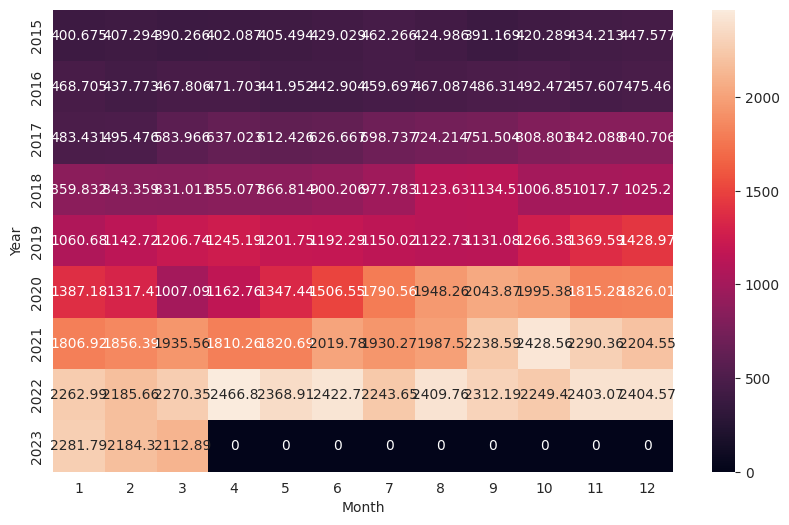

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='Month', ylabel='Price'>

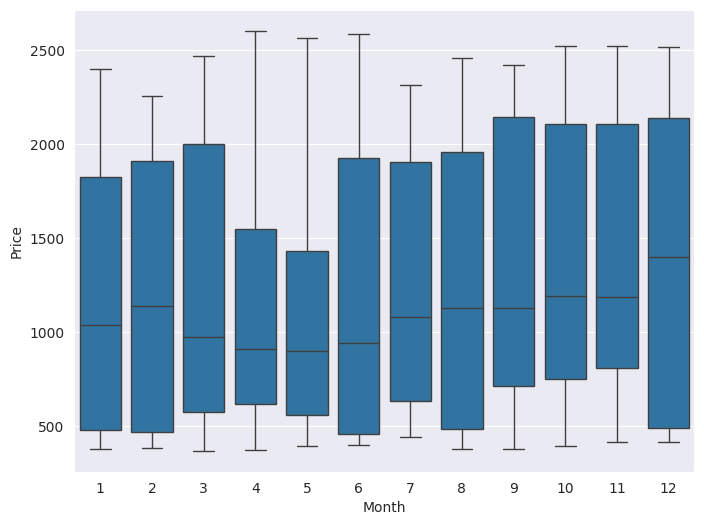

In [ ]:
# Boxplot for every month
plt.figure(figsize=(8,6))
sns.boxplot(x="Month",y="Price",data=new_df)

<Axes: xlabel='Month', ylabel='Price'>

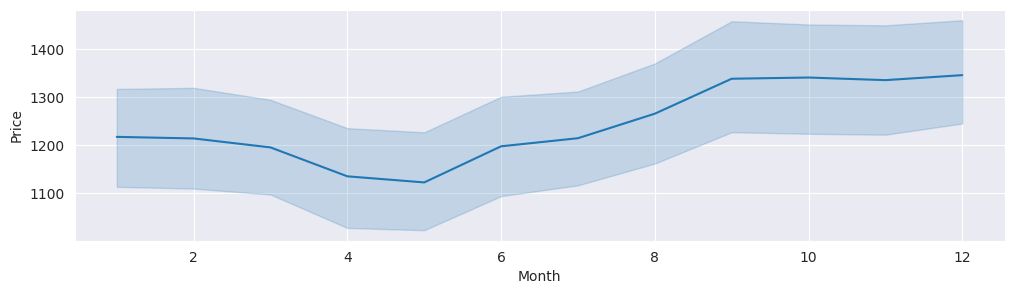

In [ ]:
#Lineplot for every month
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Price",data=new_df)

<Axes: xlabel='Year', ylabel='Price'>

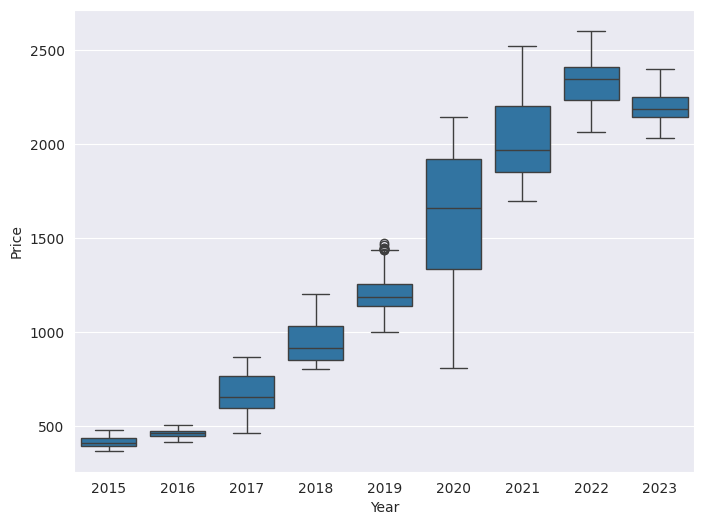

In [ ]:
# Boxplot for every year
plt.figure(figsize=(8,6))
sns.boxplot(x="Year",y="Year",data=new_df)

<Axes: xlabel='Year', ylabel='Year'>

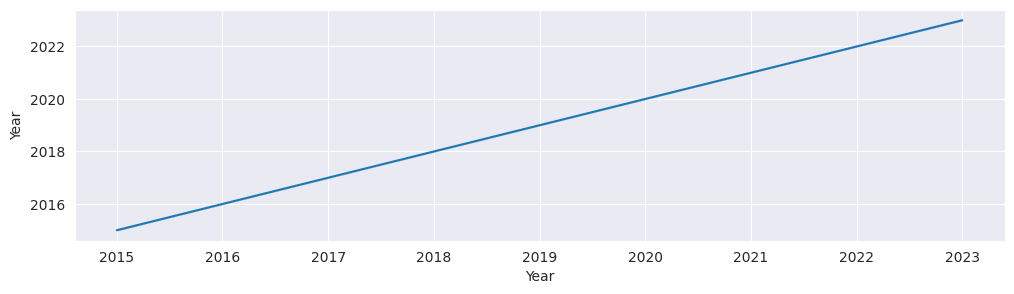

In [ ]:
#Lineplot for every year
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Year",data=new_df)

In [ ]:
import calendar

new_df['Month'] = new_df['Month'].apply(lambda x: calendar.month_abbr[x])
new_df.head()


,Date,Price,Month,Year
0,2015-01-01,405.917999,Jan,2015
1,2015-01-02,404.843658,Jan,2015
2,2015-01-05,400.409149,Jan,2015
3,2015-01-06,382.236786,Jan,2015
4,2015-01-07,390.557220,Jan,2015


In [ ]:
new_df["t"] = range(1, len(new_df) + 1)
new_df.head()

,Date,Price,Month,Year,t
0,2015-01-01,405.917999,Jan,2015,1
1,2015-01-02,404.843658,Jan,2015,2
2,2015-01-05,400.409149,Jan,2015,3
3,2015-01-06,382.236786,Jan,2015,4
4,2015-01-07,390.557220,Jan,2015,5


In [ ]:
new_df['t_square'] = new_df.t**2
new_df.head()

,Date,Price,Month,Year,t,t_square
0,2015-01-01,405.917999,Jan,2015,1,1
1,2015-01-02,404.843658,Jan,2015,2,4
2,2015-01-05,400.409149,Jan,2015,3,9
3,2015-01-06,382.236786,Jan,2015,4,16
4,2015-01-07,390.557220,Jan,2015,5,25


In [ ]:
import numpy as np
new_df["log_Price"] = np.log(new_df["Price"])
new_df.head()

,Date,Price,Month,Year,t,t_square,log_Price
0,2015-01-01,405.917999,Jan,2015,1,1,6.006151
1,2015-01-02,404.843658,Jan,2015,2,4,6.003501
2,2015-01-05,400.409149,Jan,2015,3,9,5.992487
3,2015-01-06,382.236786,Jan,2015,4,16,5.946040
4,2015-01-07,390.557220,Jan,2015,5,25,5.967574


In [ ]:
new_df.shape

(2036, 7)

In [ ]:
import pandas as pd
new_df = pd.get_dummies(new_df, columns=["Month"], dtype=int)
new_df.head()

,Date,Price,Year,t,t_square,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2015-01-01,405.917999,2015,1,1,6.006151,0,0,0,0,1,0,0,0,0,0,0,0
1,2015-01-02,404.843658,2015,2,4,6.003501,0,0,0,0,1,0,0,0,0,0,0,0
2,2015-01-05,400.409149,2015,3,9,5.992487,0,0,0,0,1,0,0,0,0,0,0,0
3,2015-01-06,382.236786,2015,4,16,5.946040,0,0,0,0,1,0,0,0,0,0,0,0
4,2015-01-07,390.557220,2015,5,25,5.967574,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
new_df.shape

(2036, 18)

Model Building

In [ ]:
Train = new_df.head(1630)
Test = new_df.tail(406)

In [ ]:
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
#Linear
linear_model = smf.ols('Price~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))
rmse_linear

296.2492248101593

In [ ]:
#Exponential
Exp = smf.ols('log_Price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

550.634418022693

In [ ]:
#Quadratic
Quad = smf.ols('Price~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_Quad))**2))
rmse_Quad

350.9104852439293

In [ ]:
#Additive Seasonality
add_sea = smf.ols('Price~Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1319.9085324330931

In [ ]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Price~t+t_square+Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

364.33484850232554

In [ ]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Price~Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1449.6325729235164

In [ ]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea]),"Variables":pd.Series(["Price,t","log_Price,t","Price,t,t_square","Price,month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep","Price,t,t_square,month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep","log_Price,month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep"])}
type(data)

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,Variables
0,rmse_linear,296.249225,"Price,t"
2,rmse_Quad,350.910485,"Price,t,t_square"
4,rmse_add_sea_quad,364.334849,"Price,t,t_square,month_Apr+month_Aug+month_Dec..."
1,rmse_Exp,550.634418,"log_Price,t"
3,rmse_add_sea,1319.908532,"Price,month_Apr+month_Aug+month_Dec+month_Feb+..."
5,rmse_Mult_sea,1449.632573,"log_Price,month_Apr+month_Aug+month_Dec+month_..."


**Linear model** is selected as it gives least rmse when compared to others.

In [ ]:
import pandas as pd

# Create a list of dates from 29-03-2023 to 31-03-2024
dates = pd.date_range('2023-03-29', '2024-03-31')

# Create a DataFrame with the dates
table = pd.DataFrame({'Date': dates})

# Print the DataFrame
table


,Date
0,2023-03-29
1,2023-03-30
2,2023-03-31
3,2023-04-01
4,2023-04-02
...,...
364,2024-03-27
365,2024-03-28
366,2024-03-29
367,2024-03-30


In [ ]:
table['Month'] = pd.to_datetime(table['Date']).dt.month
table['Year'] = pd.to_datetime(table['Date']).dt.year

In [ ]:
table

,Date,Month,Year
0,2023-03-29,3,2023
1,2023-03-30,3,2023
2,2023-03-31,3,2023
3,2023-04-01,4,2023
4,2023-04-02,4,2023
...,...,...,...
364,2024-03-27,3,2024
365,2024-03-28,3,2024
366,2024-03-29,3,2024
367,2024-03-30,3,2024


In [ ]:
import calendar

table['Month'] = table['Month'].apply(lambda x: calendar.month_abbr[x])
table.head()

,Date,Month,Year
0,2023-03-29,Mar,2023
1,2023-03-30,Mar,2023
2,2023-03-31,Mar,2023
3,2023-04-01,Apr,2023
4,2023-04-02,Apr,2023


In [ ]:
import pandas as pd
table = pd.get_dummies(table, columns=["Month"], dtype=int)
table.head()

,Date,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2023-03-29,2023,0,0,0,0,0,0,0,1,0,0,0,0
1,2023-03-30,2023,0,0,0,0,0,0,0,1,0,0,0,0
2,2023-03-31,2023,0,0,0,0,0,0,0,1,0,0,0,0
3,2023-04-01,2023,1,0,0,0,0,0,0,0,0,0,0,0
4,2023-04-02,2023,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
table["t"] = table.index + 2036
table

,Date,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t
0,2023-03-29,2023,0,0,0,0,0,0,0,1,0,0,0,0,2036
1,2023-03-30,2023,0,0,0,0,0,0,0,1,0,0,0,0,2037
2,2023-03-31,2023,0,0,0,0,0,0,0,1,0,0,0,0,2038
3,2023-04-01,2023,1,0,0,0,0,0,0,0,0,0,0,0,2039
4,2023-04-02,2023,1,0,0,0,0,0,0,0,0,0,0,0,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2024-03-27,2024,0,0,0,0,0,0,0,1,0,0,0,0,2400
365,2024-03-28,2024,0,0,0,0,0,0,0,1,0,0,0,0,2401
366,2024-03-29,2024,0,0,0,0,0,0,0,1,0,0,0,0,2402
367,2024-03-30,2024,0,0,0,0,0,0,0,1,0,0,0,0,2403


In [ ]:
table['t_square'] = table.t**2
table

,Date,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
0,2023-03-29,2023,0,0,0,0,0,0,0,1,0,0,0,0,2036,4145296
1,2023-03-30,2023,0,0,0,0,0,0,0,1,0,0,0,0,2037,4149369
2,2023-03-31,2023,0,0,0,0,0,0,0,1,0,0,0,0,2038,4153444
3,2023-04-01,2023,1,0,0,0,0,0,0,0,0,0,0,0,2039,4157521
4,2023-04-02,2023,1,0,0,0,0,0,0,0,0,0,0,0,2040,4161600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2024-03-27,2024,0,0,0,0,0,0,0,1,0,0,0,0,2400,5760000
365,2024-03-28,2024,0,0,0,0,0,0,0,1,0,0,0,0,2401,5764801
366,2024-03-29,2024,0,0,0,0,0,0,0,1,0,0,0,0,2402,5769604
367,2024-03-30,2024,0,0,0,0,0,0,0,1,0,0,0,0,2403,5774409


In [ ]:
#Build the model on entire data set
model_full = smf.ols('Price~t',data=new_df).fit()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import patsy

In [ ]:
pred_new  = pd.Series(model_full.predict(table))
pred_new

0      2419.608426
1      2420.765204
2      2421.921982
3      2423.078760
4      2424.235538
          ...     
364    2840.675695
365    2841.832473
366    2842.989251
367    2844.146029
368    2845.302807
Length: 369, dtype: float64

In [ ]:
table["forecasted_Price"] = pd.Series(pred_new)

In [ ]:
new_var = pd.concat([new_df,table])
new_var.shape

(2405, 19)

<Axes: >

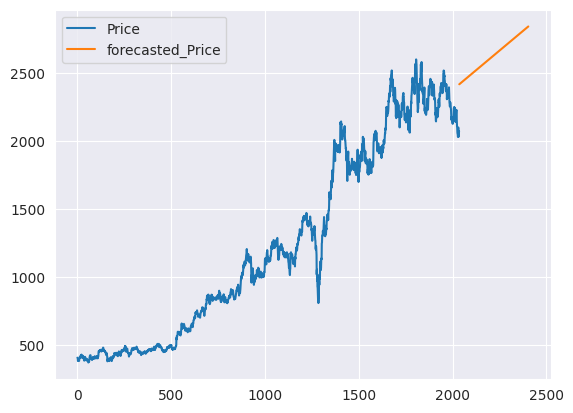

In [ ]:
new_var[['Price','forecasted_Price']].reset_index(drop=True).plot()